In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"D:\Desktop\lab8\greenhouse_gas_inventory_data_data.csv")

# Exploring data 

In [3]:
data.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [53]:
data['value'][0]

393126.946994288

(array([6.55702705e-07, 5.44949694e-09, 2.56446915e-09, 5.44949694e-09,
        4.48782101e-09]),
 array([1.10375000e-06, 1.48444159e+06, 2.96888319e+06, 4.45332478e+06,
        5.93776637e+06, 7.42220796e+06]),
 <BarContainer object of 5 artists>)

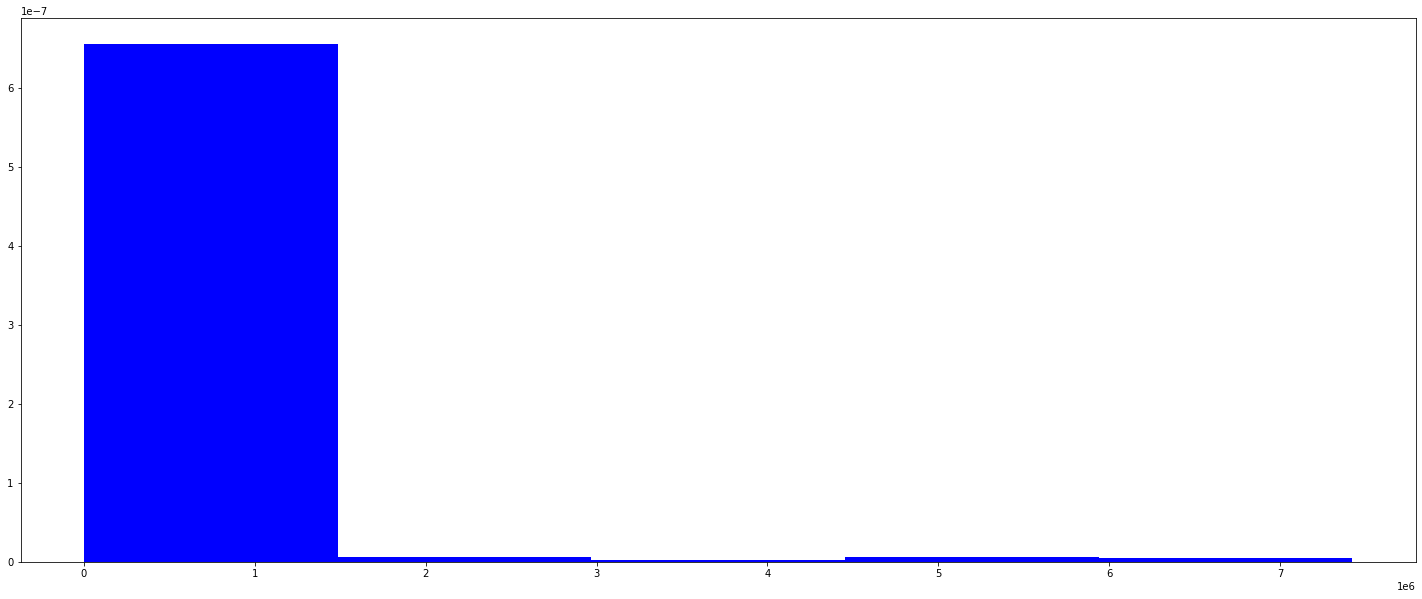

In [4]:
plt.figure(figsize=(25,10))

plt.hist(data["value"].values, color = "blue", bins=5,density = True  )

<AxesSubplot:>

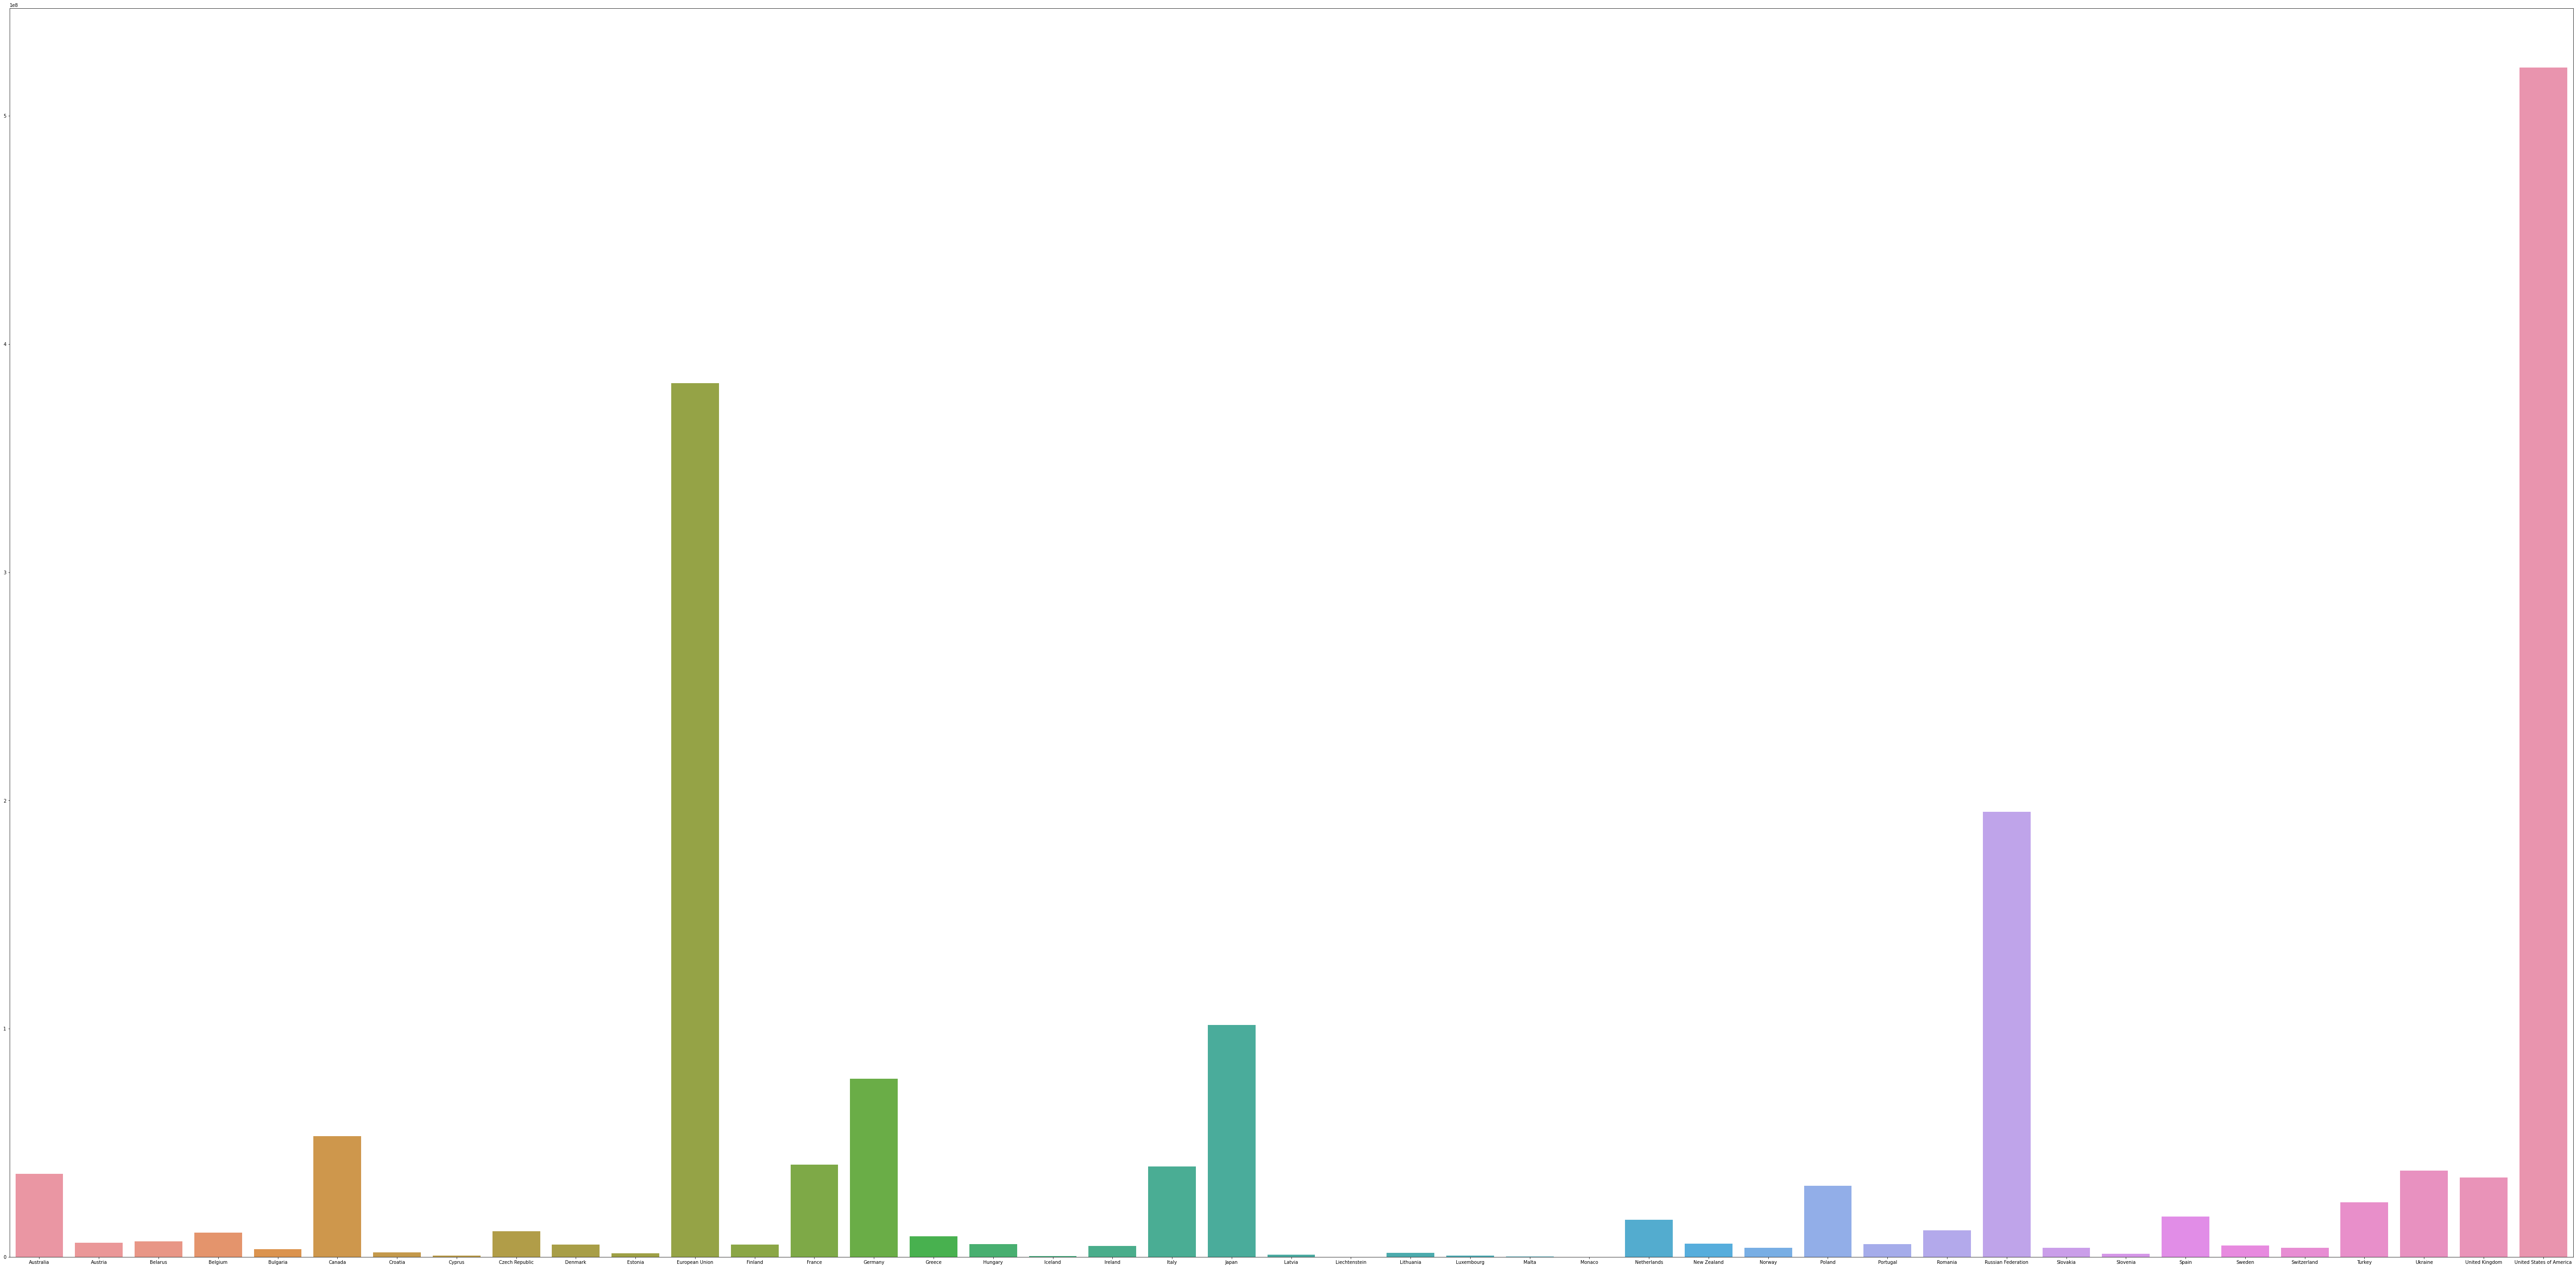

In [5]:
plt.figure(figsize=(100,50))

sns.barplot(x = list(data.groupby("country_or_area").sum()["value"].index) , y = list(data.groupby("country_or_area")["value"].sum()) )


# get the heighest 3 countries with gas emissions

In [89]:
df = pd.DataFrame(data.sort_values(by = 'value', ascending = False)).groupby('country_or_area', sort = False)
for grp,i in zip(df, range(5)):
    print(grp[0], ': ', grp[1]['value'].sum())

United States of America :  521109830.8160138
European Union :  382871969.10720843
Russian Federation :  195081379.5770943
Japan :  101617463.42908241
Germany :  78091816.96135217


In [5]:
## your code here


country_or_area
United States of America    5.211098e+08
European Union              3.828720e+08
Russian Federation          1.950814e+08
Name: value, dtype: float64

In [58]:
data.groupby("year")["value"].sum().sort_values(ascending=False)

year
1990    7.454556e+07
1991    7.281531e+07
2007    7.124275e+07
2006    7.096346e+07
2005    7.092115e+07
2004    7.091974e+07
1992    7.042643e+07
2003    7.024425e+07
1996    6.991312e+07
2008    6.974946e+07
1993    6.934071e+07
1997    6.927949e+07
2001    6.926630e+07
2002    6.925748e+07
2000    6.920760e+07
1998    6.894575e+07
1995    6.886563e+07
1999    6.847472e+07
1994    6.845823e+07
2010    6.729743e+07
2011    6.650470e+07
2012    6.574504e+07
2013    6.555464e+07
2009    6.537691e+07
2014    6.451383e+07
Name: value, dtype: float64

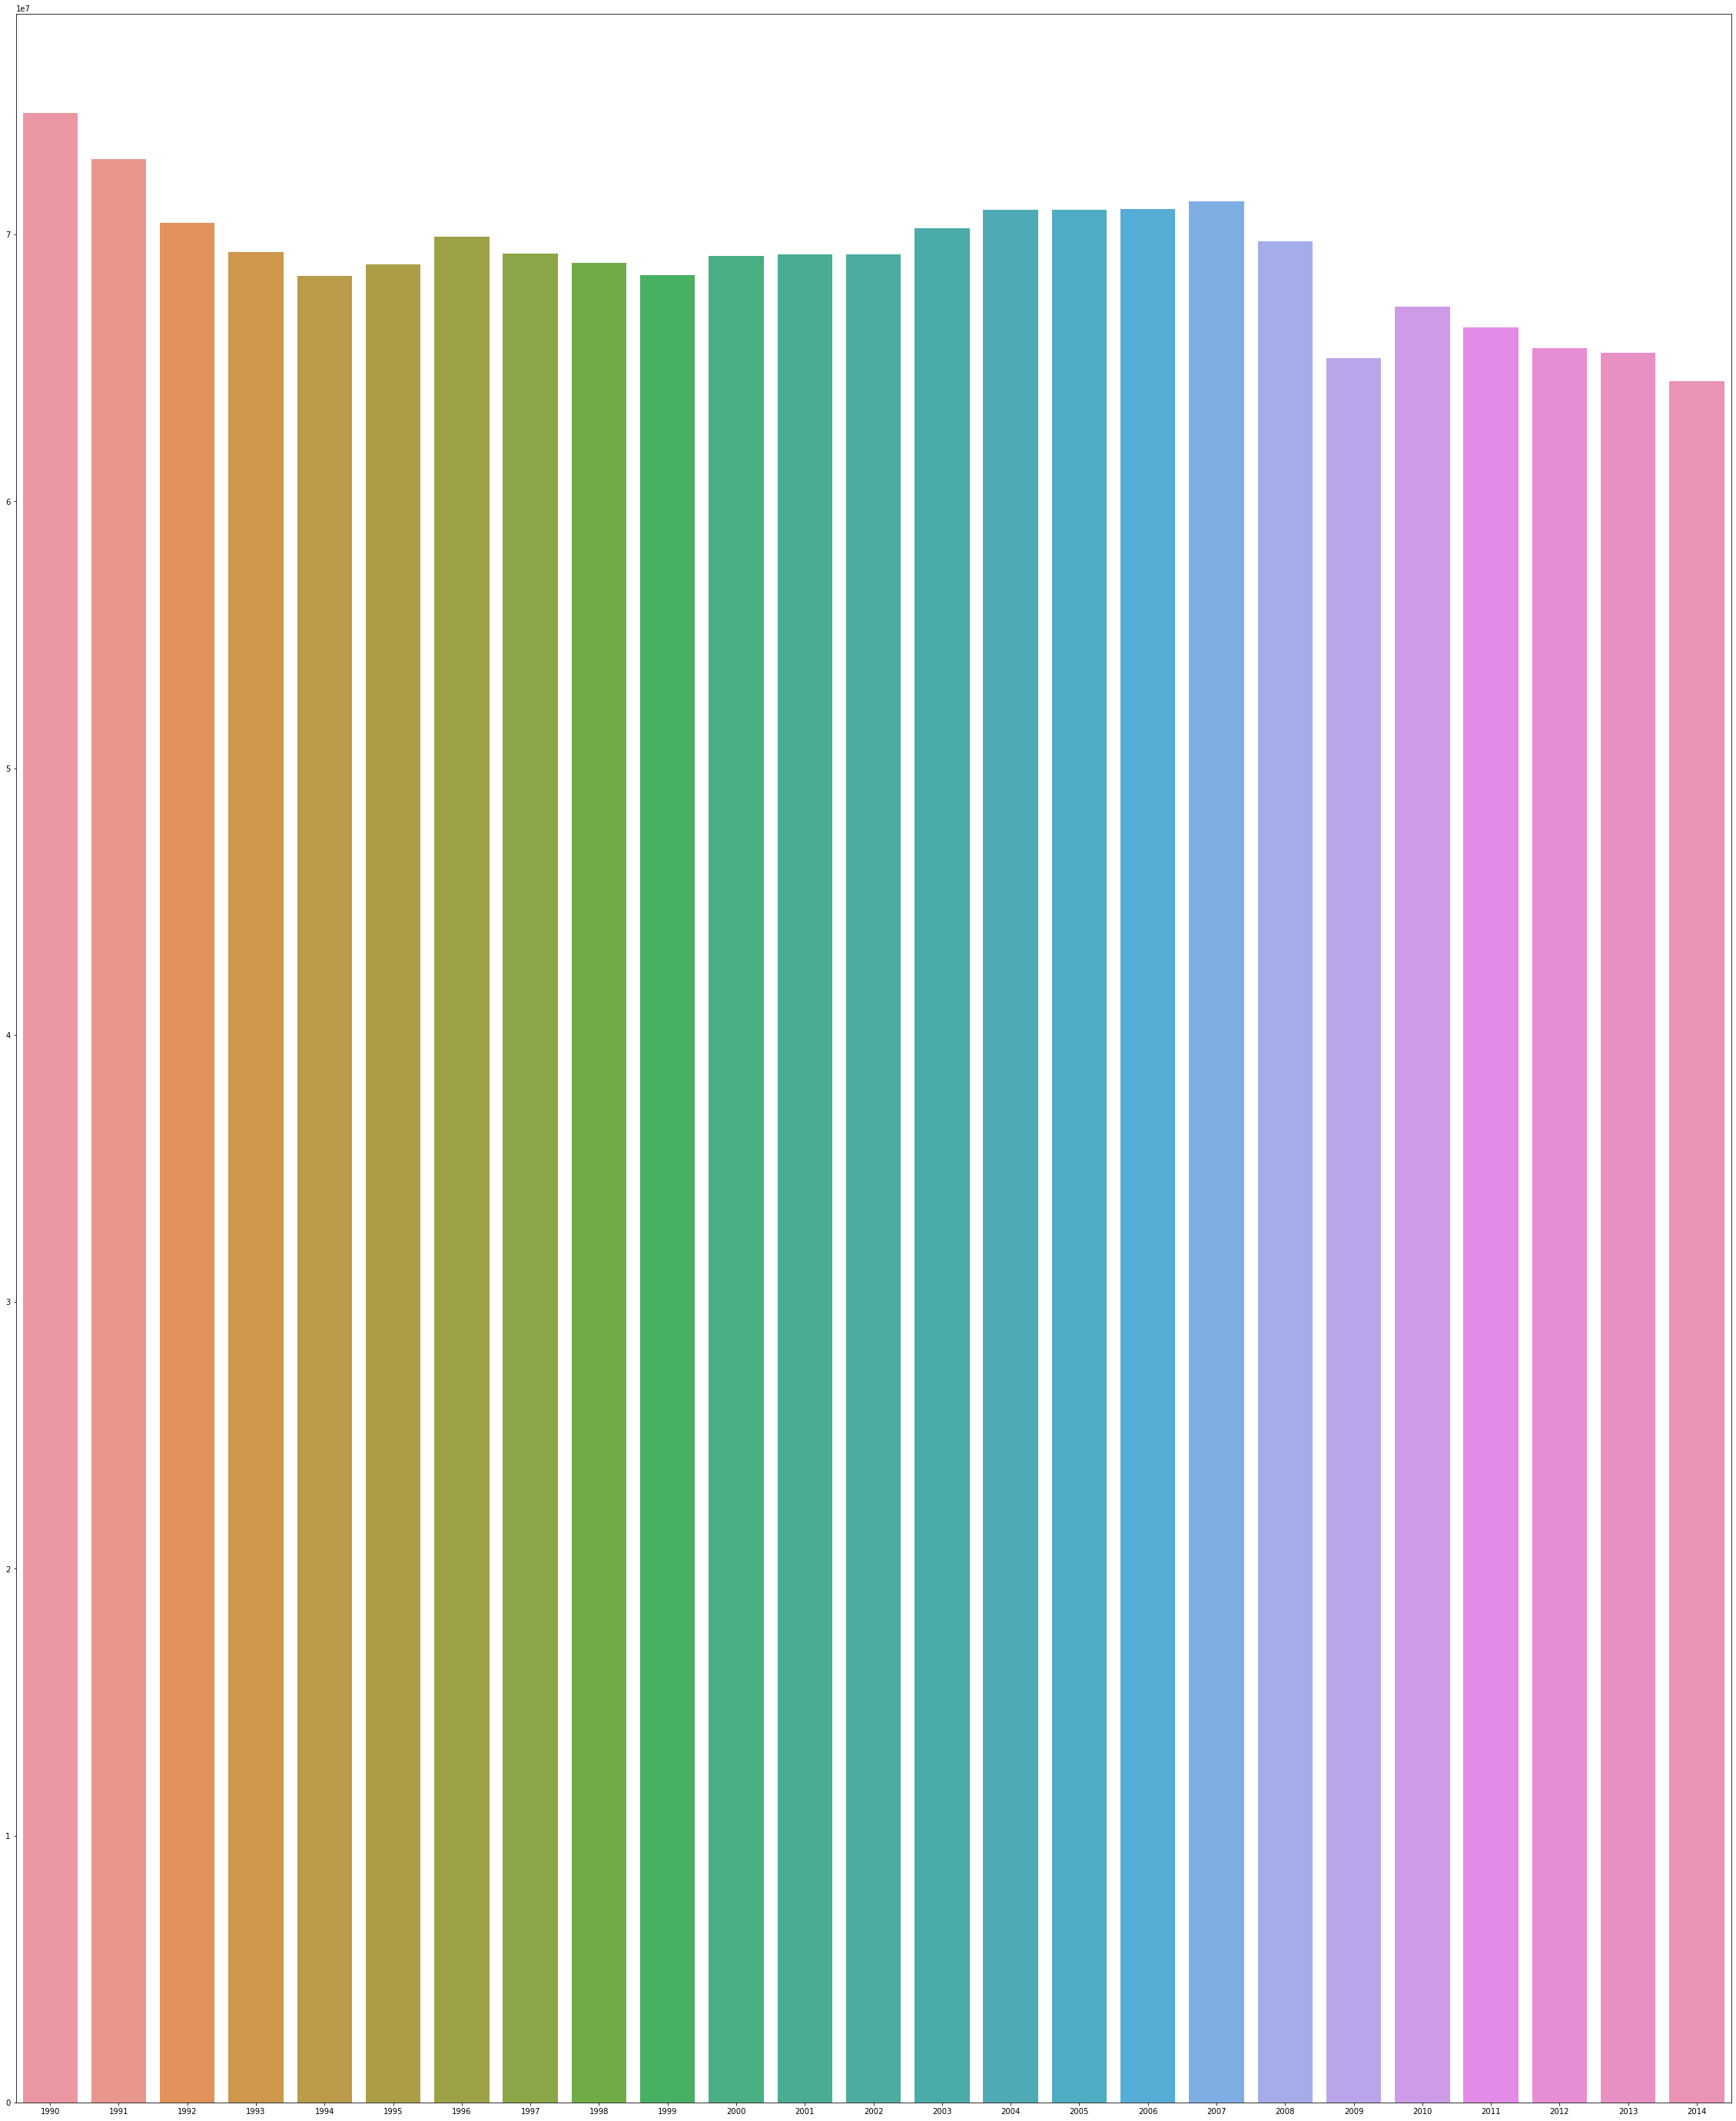

In [60]:
plt.figure(figsize=(40,50))

sns.barplot(x = list(data.groupby("year").sum()["value"].index) , y = list(data.groupby("year")["value"].sum()) );


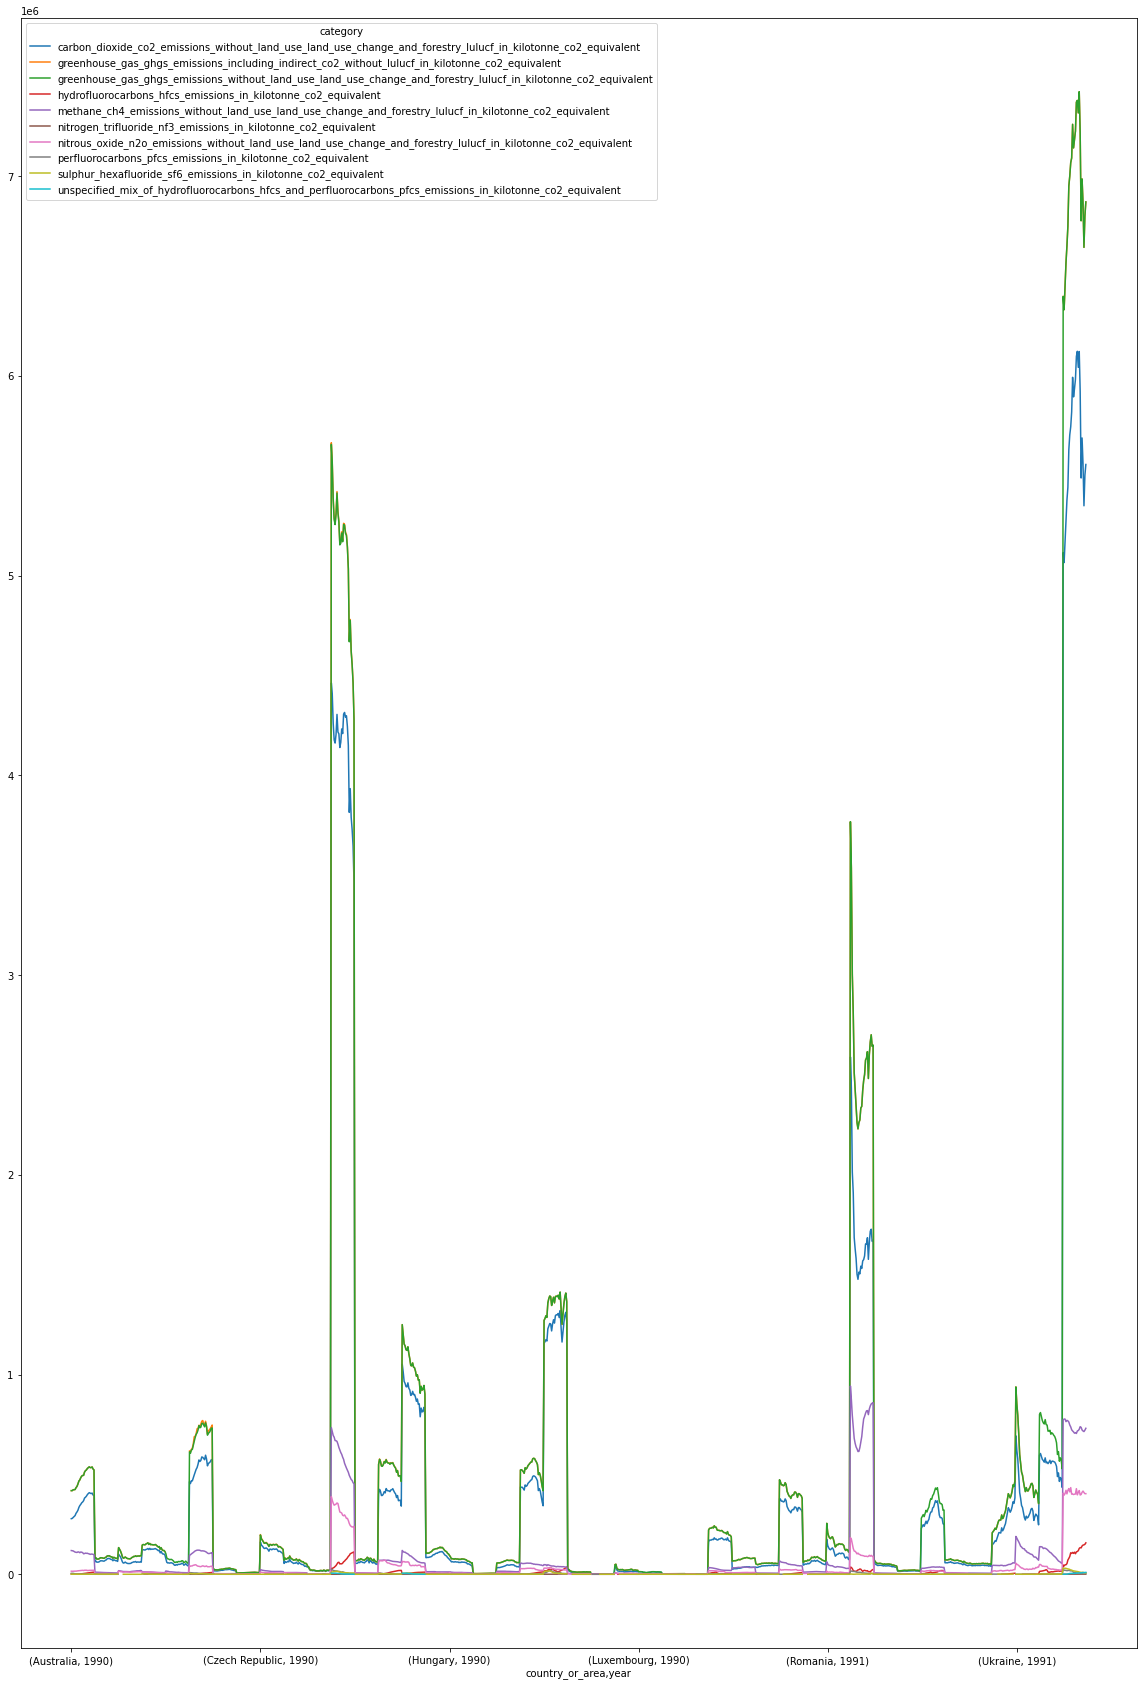

In [62]:

table = pd.pivot_table(data, values='value', index=['country_or_area', 'year'], columns=['category'])
table.head()
table.plot(figsize=(20,30));


In [72]:
table

category                       carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  \
country_or_area          year                                                                                                                  
Australia                1990                                       2.782659e+05                                                               
                         1991                                       2.797416e+05                                                               
                         1992                                       2.847661e+05                                                               
                         1993                                       2.891423e+05                                                               
                         1994                                       2.938307e+05                                                               
...                                                                          ...                                                               
United States of America 2010                                       5.688756e+06                                                               
                         2011                                       5.559508e+06                                                               
                         2012                                       5.349221e+06                                                               
                         2013                                       5.502551e+06                                                               
                         2014                                       5.556007e+06                                                               

category                       greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent  \
country_or_area          year                                                                                                    
Australia                1990                                       4.186230e+05                                                 
                         1991                                       4.186741e+05                                                 
                         1992                                       4.230801e+05                                                 
                         1993                                       4.237649e+05                                                 
                         1994                                       4.240930e+05                                                 
...                                                                          ...                                                 
United States of America 2010                                       6.985457e+06                                                 
                         2011                                       6.865398e+06                                                 
                         2012                                       6.643011e+06                                                 
                         2013                                       6.799979e+06                                                 
                         2014                                       6.870446e+06                                                 

category                       greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  \
country_or_area          year                                                                                                                   
Australia                1990                                       4.186230e+05                                                                
 

In [64]:
gasnames = table.columns.values

def country_plot(nameOfCountry):
    data = table.loc[nameOfCountry]
    plt.figure(figsize=(40,40))
    plt.plot(data)
    plt.legend(gasnames)
    plt.title(nameOfCountry)

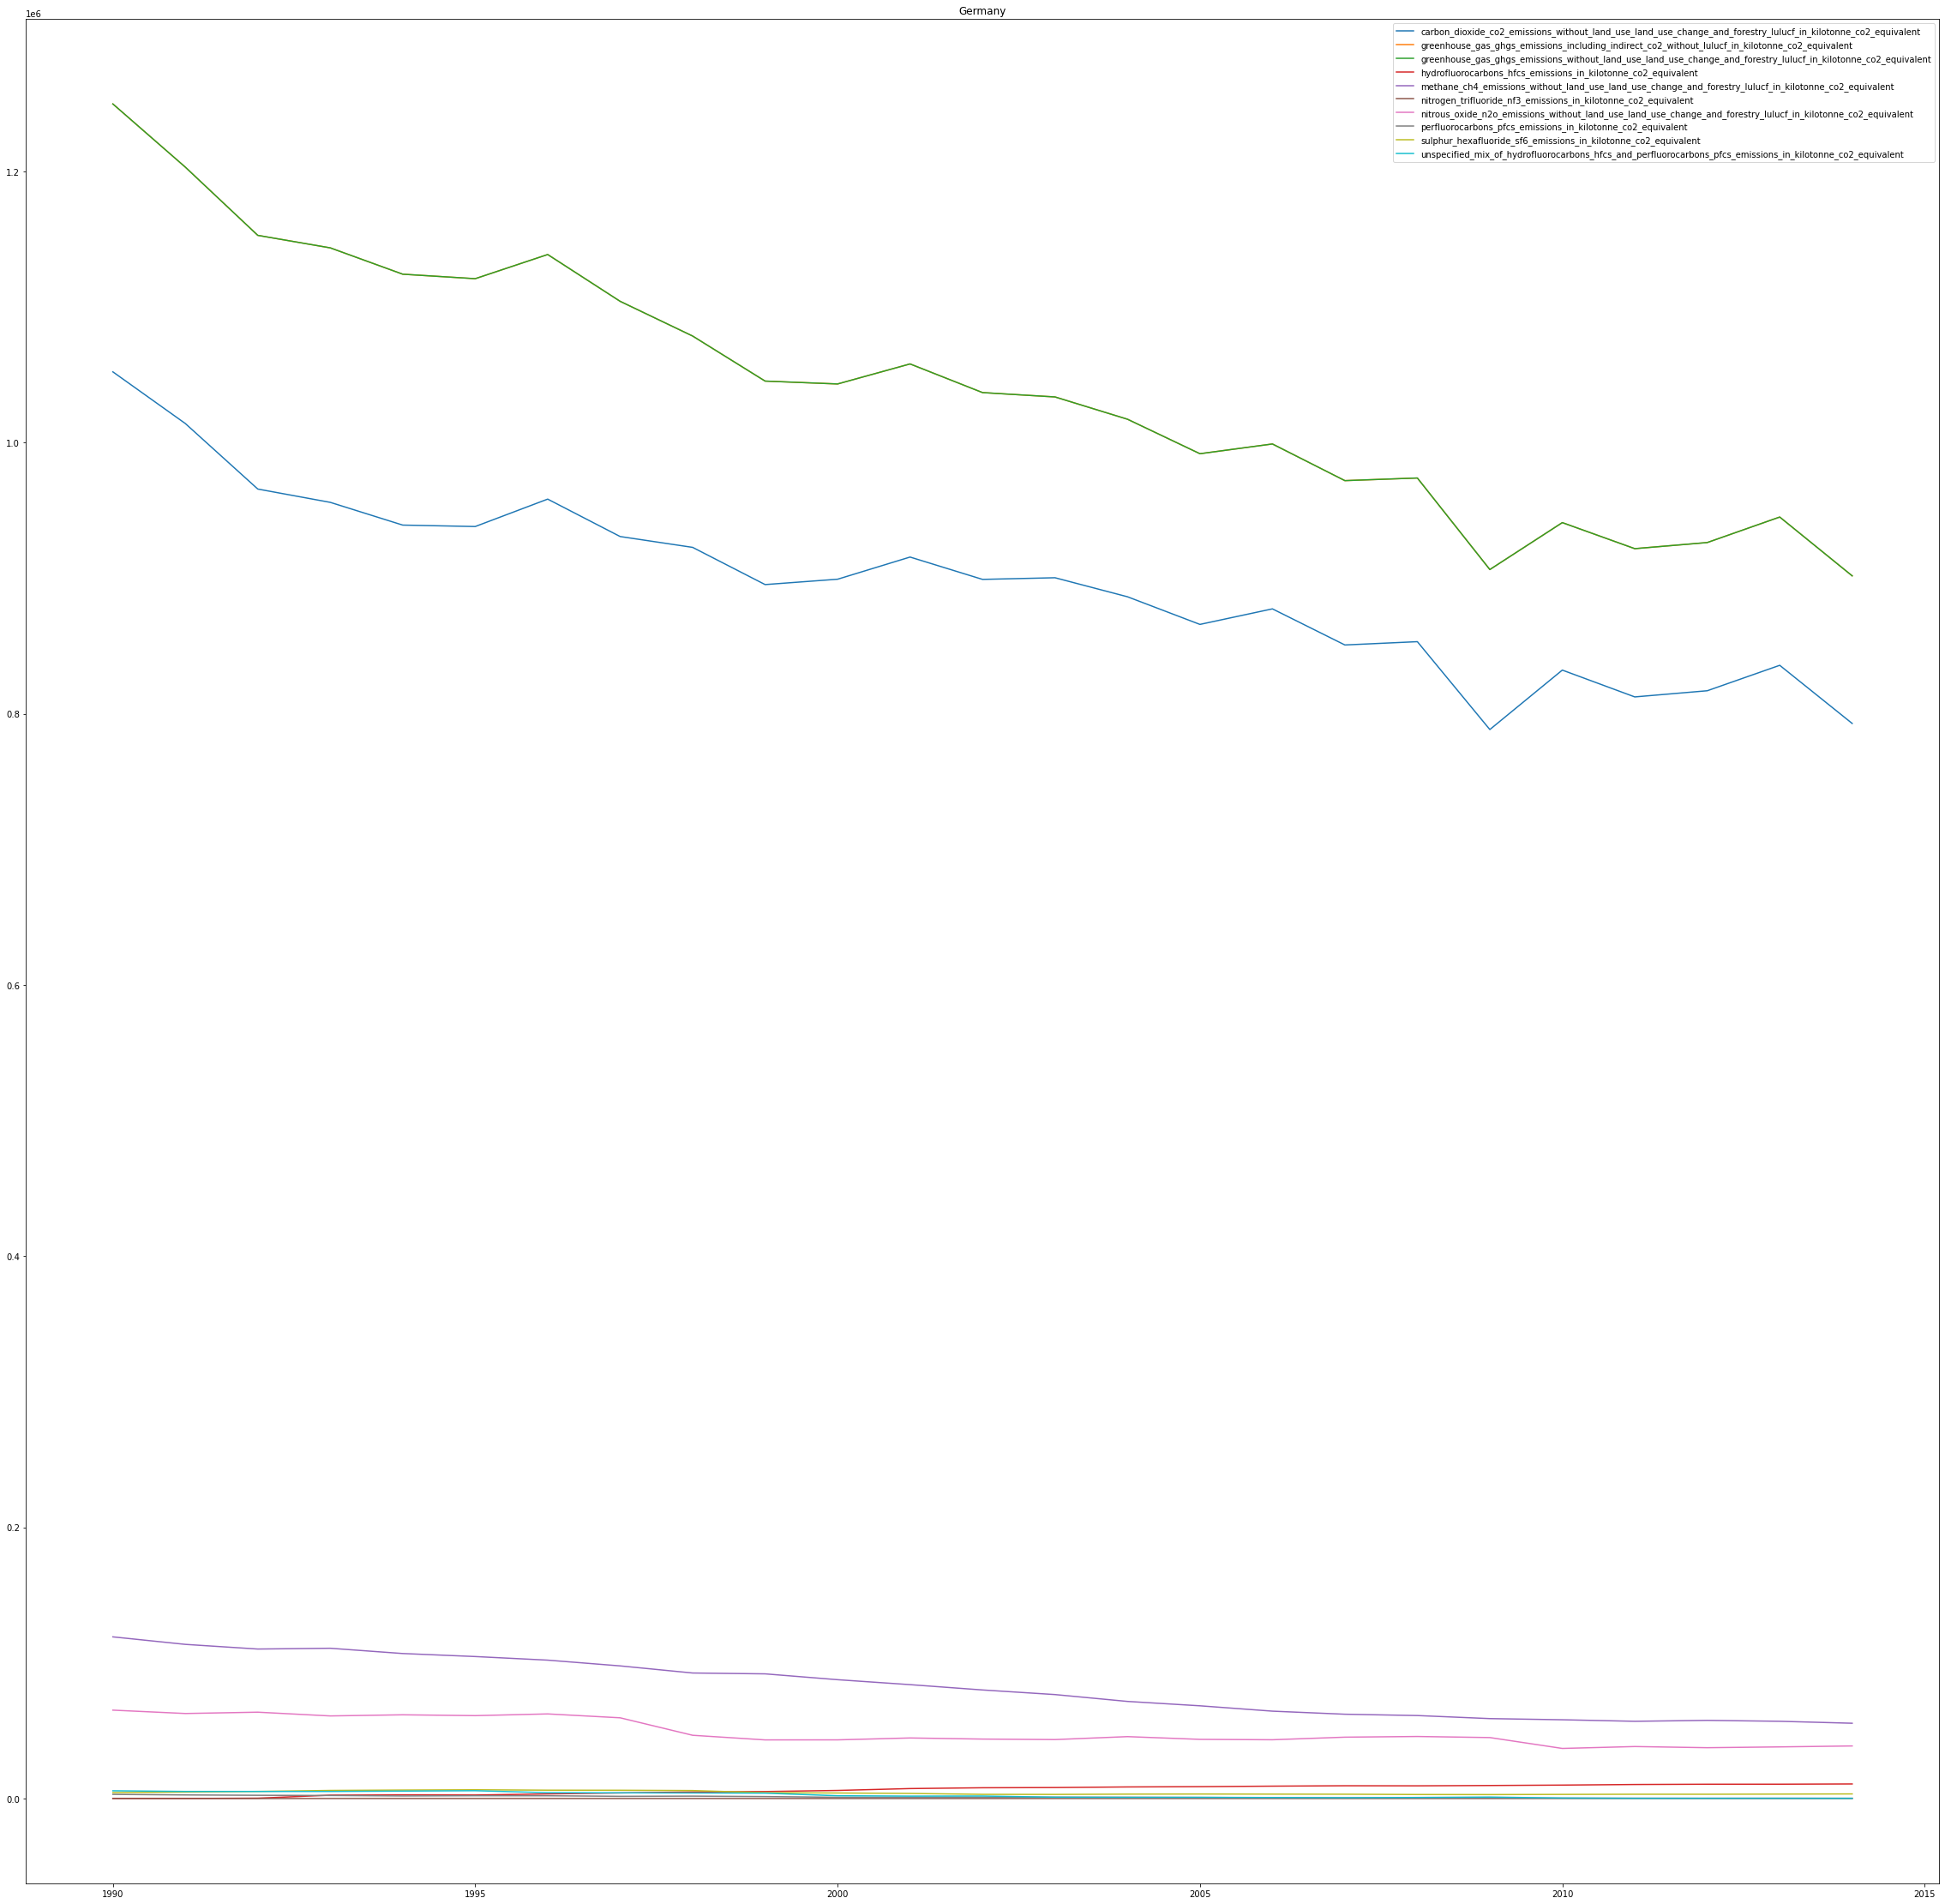

In [65]:
country_plot('Germany') # Germany is reducing gas emission in time!

In [66]:
data_onehot = pd.get_dummies(data,columns=['category', 'year','country_or_area'])

In [67]:
data_onehot

,value,category_carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,category_greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,category_greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,category_hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,category_methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,category_nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,category_nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,category_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,category_sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,...,country_or_area_Russian Federation,country_or_area_Slovakia,country_or_area_Slovenia,country_or_area_Spain,country_or_area_Sweden,country_or_area_Switzerland,country_or_area_Turkey,country_or_area_Ukraine,country_or_area_United Kingdom,country_or_area_United States of America
0,393126.946994,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,396913.936530,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,406462.847704,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,403705.528314,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,406200.993184,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,593.222570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8402,586.939752,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8403,574.414624,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8404,566.900968,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# visualizing data

In [68]:
X = data_onehot

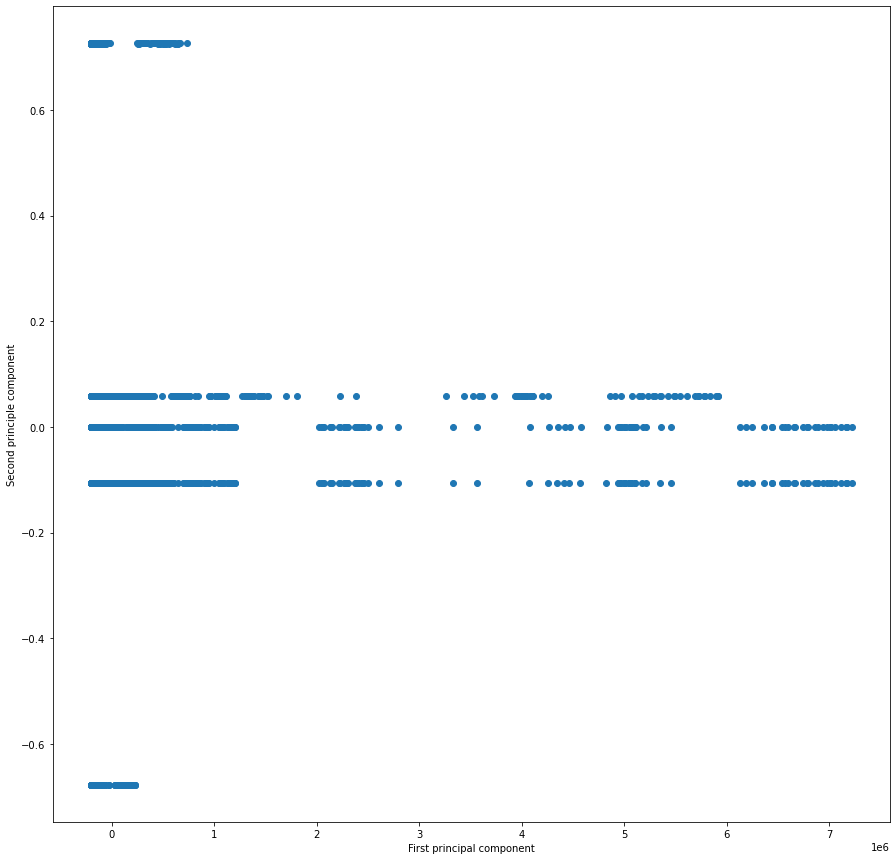

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X.values)
x_pca = pca.transform(X.values)

plt.figure(figsize=(15,15))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second principle component');

# Clustering part

In [71]:
data_onehot

,value,category_carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,category_greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,category_greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,category_hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,category_methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,category_nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,category_nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,category_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,category_sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,...,country_or_area_Russian Federation,country_or_area_Slovakia,country_or_area_Slovenia,country_or_area_Spain,country_or_area_Sweden,country_or_area_Switzerland,country_or_area_Turkey,country_or_area_Ukraine,country_or_area_United Kingdom,country_or_area_United States of America
0,393126.946994,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,396913.936530,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,406462.847704,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,403705.528314,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,406200.993184,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,593.222570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8402,586.939752,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8403,574.414624,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8404,566.900968,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
X = data_onehot

# How much is too much ? 

## use the elbow method to determine the best number of clusters for the k means clustering algorithm

In [83]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias  = []
mapping2 = {}
mapping1 = {}
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    
    distortions.append(sum(np.min(cdist(X,model.cluster_centers_,'euclidean'),axis = 1))/X.shape[0])
    mapping1[k] = sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'),axis = 1))/X.shape[0]
    inertias.append(model.inertia_)
    mapping2[k] = model.inertia_
    

In [84]:
for key,val in mapping2.items():
    print(str(key)+' : '+str(val))

1 : 5435159051817798.0
2 : 870535641915265.8
3 : 420197900872662.8
4 : 249333253702542.44
5 : 137124459051080.83
6 : 83602688894964.08
7 : 53995866610553.47
8 : 40572541053125.984
9 : 31556620562734.375


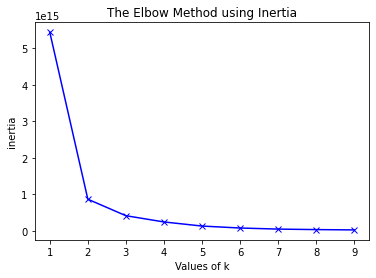

In [85]:
## your code here
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of k')
plt.ylabel('inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


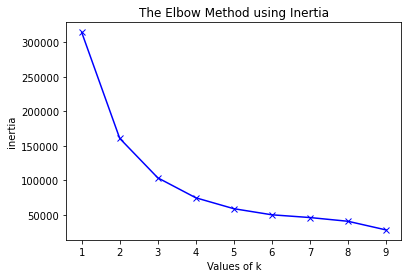

In [86]:
## your code here 

## your code here
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of k')
plt.ylabel('inertia')
plt.title('The Elbow Method using Inertia')
plt.show()
